In [2]:
#import all the necessary libraries and packages here so that we can use them easily ahead

from os import statvfs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,classification_report,confusion_matrix,r2_score,roc_auc_score,roc_curve,accuracy_score,mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import warnings
import pickle


In [29]:
df=pd.read_csv('/content/data.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [30]:
df.drop(['isFlaggedFraud'], axis=1, inplace=True)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


Here are the features of our dataset, and a short description of what they do.

1.step: represents a unit of time where 1 step equals 1 hour <br>
2.type: type of online transaction<br>
3.amount: the amount of the transaction<br>
4.nameOrig: customer starting the transaction<br>
5.oldbalanceOrg: balance before the transaction<br>
6.newbalanceOrig: balance after the transaction<br>
7.nameDest: recipient of the transaction<br>
8.oldbalanceDest: initial balance of recipient before the transaction<br>
9.newbalanceDest: the new balance of recipient after the transaction<br>
10.isFraud: fraud transaction<br>


<h1> So here our target column is 'isFraud' and the rest of the columns are helper columns, which will help in predicting the target column

<br>



#Data Preprocessing

In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
56198,9,CASH_OUT,16024.60,C1088493558,442118.00,426093.40,C1084323592,5818.0,8074.67,0.0
56199,9,PAYMENT,20502.92,C410885495,3073.00,0.00,M1731153077,0.0,0.00,0.0
56200,9,CASH_IN,175858.36,C702220078,290164.69,466023.05,C65594254,24083.0,0.00,0.0
56201,9,PAYMENT,2955.89,C1632500548,466023.05,463067.17,M363811903,0.0,0.00,0.0
56202,9,PAYMEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(56203, 10)

So we have 3776513 rows(observations) and 10 features(columns)


In [ ]:
df.info

<bound method DataFrame.info of        step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         1   PAYMENT    9839.64  C1231006815      170136.00       160296.36   
1         1   PAYMENT    1864.28  C1666544295       21249.00        19384.72   
2         1  TRANSFER     181.00  C1305486145         181.00            0.00   
3         1  CASH_OUT     181.00   C840083671         181.00            0.00   
4         1   PAYMENT   11668.14  C2048537720       41554.00        29885.86   
...     ...       ...        ...          ...            ...             ...   
56198     9  CASH_OUT   16024.60  C1088493558      442118.00       426093.40   
56199     9   PAYMENT   20502.92   C410885495        3073.00            0.00   
56200     9   CASH_IN  175858.36   C702220078      290164.69       466023.05   
56201     9   PAYMENT    2955.89  C1632500548      466023.05       463067.17   
56202     9    PAYMEN        NaN          NaN            NaN             NaN   

       

In [5]:
df.isnull().any()

step              False
type              False
amount             True
nameOrig           True
oldbalanceOrg      True
newbalanceOrig     True
nameDest           True
oldbalanceDest     True
newbalanceDest     True
isFraud            True
dtype: bool

In [6]:
df.isnull().sum()

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64

So as there is only a single null value in our dataset, we can remove this and it will not affect our model because the dataset length is to large.

In [31]:
df.dropna(axis=0,inplace=True)

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

So now we are free of the null values

In [ ]:
#checking how many unique values do we have in our target column
df.isFraud.nunique()

2

In [ ]:
df.isFraud.unique()


array([0., 1.])

In [ ]:
#checking how many values are there in each unique category of our target column'
df.isFraud.value_counts()

0.0    56102
1.0      100
Name: isFraud, dtype: int64

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,56202.000000,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,56202.000000
mean,7.624426,1.598924e+05,7.322726e+05,7.464767e+05,8.391746e+05,1.169835e+06,0.001779
std,1.999423,3.293750e+05,2.184696e+06,2.222611e+06,2.407619e+06,2.893515e+06,0.042145
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,8.135660e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,8.000000,3.623700e+04,1.788471e+04,0.000000e+00,5.114860e+03,2.167320e+03,0.000000
75%,9.000000,1.918409e+05,1.401448e+05,1.534157e+05,4.722510e+05,8.965790e+05,0.000000
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,3.017978e+07,3.197699e+07,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56202 entries, 0 to 56201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56202 non-null  int64  
 1   type            56202 non-null  object 
 2   amount          56202 non-null  float64
 3   nameOrig        56202 non-null  object 
 4   oldbalanceOrg   56202 non-null  float64
 5   newbalanceOrig  56202 non-null  float64
 6   nameDest        56202 non-null  object 
 7   oldbalanceDest  56202 non-null  float64
 8   newbalanceDest  56202 non-null  float64
 9   isFraud         56202 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.7+ MB


In [ ]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.082987,-0.044298,-0.044521,-0.003309,0.014167,-0.052039
amount,0.082987,1.000000,0.003141,-0.006750,0.280046,0.400350,0.053073
oldbalanceOrg,-0.044298,0.003141,1.000000,0.998312,0.118636,0.084772,-0.002842
newbalanceOrig,-0.044521,-0.006750,0.998312,1.000000,0.121091,0.084138,-0.013623
oldbalanceDest,-0.003309,0.280046,0.118636,0.121091,1.000000,0.929135,-0.011274
newbalanceDest,0.014167,0.400350,0.084772,0.084138,0.929135,1.000000,-0.007438
isFraud,-0.052039,0.053073,-0.002842,-0.013623,-0.011274,-0.007438,1.000000


<ipython-input-17-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

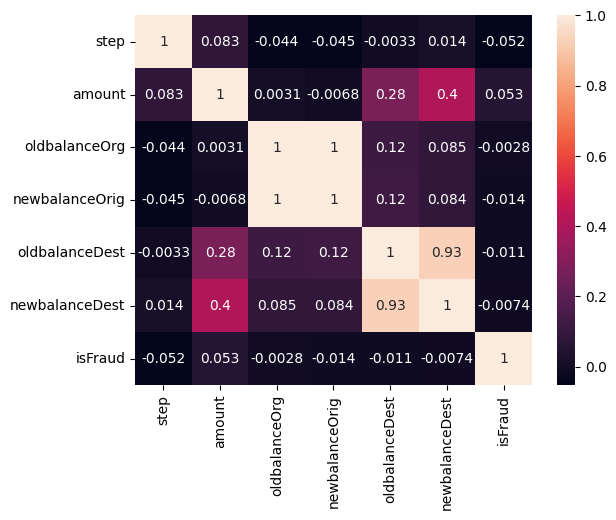

In [ ]:
sns.heatmap(df.corr(),annot=True)

###Data Visualisaton

##Univariate Analysis

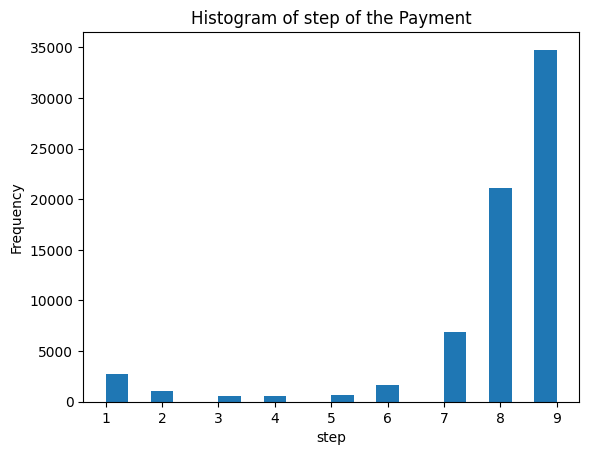

In [ ]:
# Choose the feature (column) you want to create a histogram for
feature_name = 'step'

# Plot the histogram
plt.hist(df[feature_name], bins=20)  # You can adjust the number of bins as needed
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.title('Histogram of step of the Payment')
plt.show()

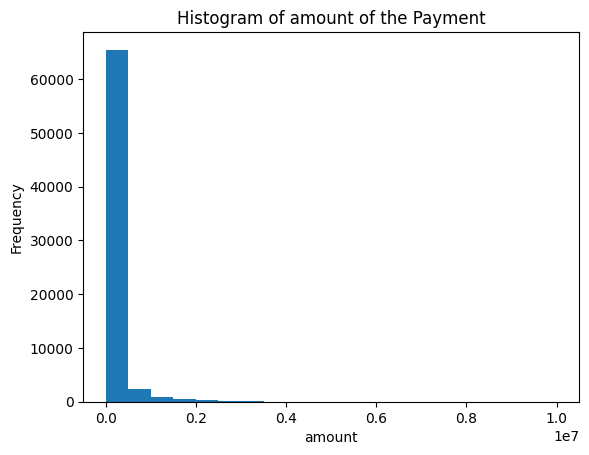

In [ ]:
# Choose the feature (column) you want to create a histogram for
feature_name = 'amount'

# Plot the histogram
plt.hist(df[feature_name], bins=20)  # You can adjust the number of bins as needed
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.title('Histogram of amount of the Payment')
plt.show()

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


<Axes: xlabel='type', ylabel='count'>

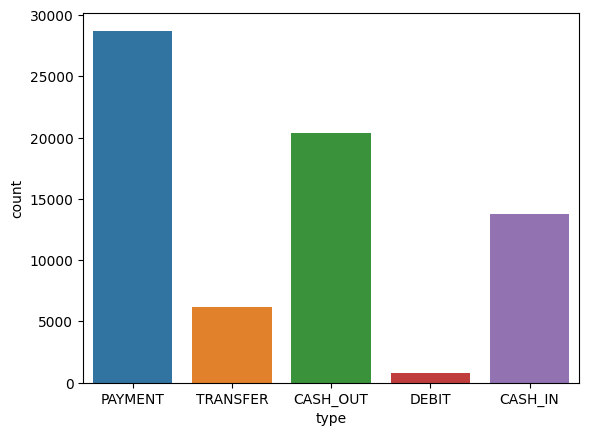

In [ ]:
sns.countplot(data=df,x='type')

<Axes: xlabel='step', ylabel='count'>

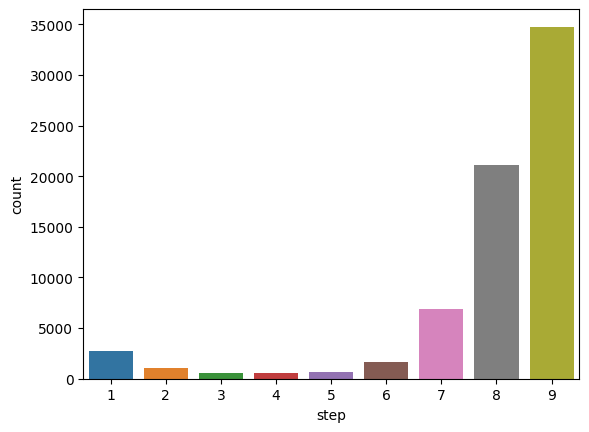

In [ ]:
sns.countplot(data=df,x='step')

<Axes: xlabel='isFraud', ylabel='count'>

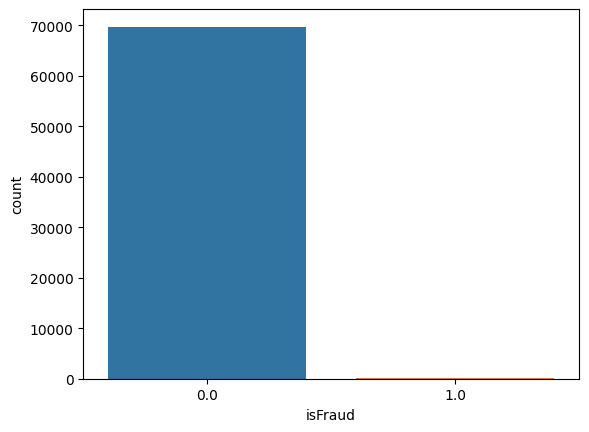

In [ ]:
sns.countplot(data=df,x='isFraud')


<Axes: xlabel='amount'>

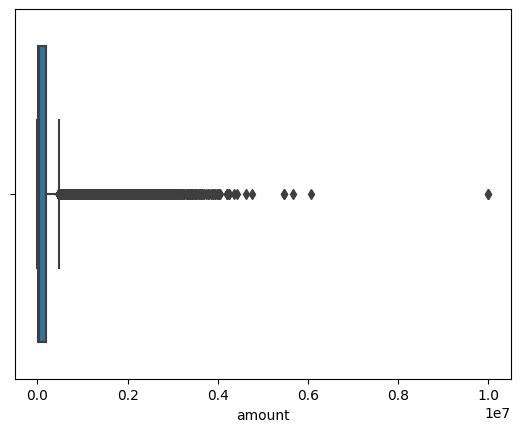

In [ ]:
sns.boxplot(data=df,x='amount')

<Axes: xlabel='step'>

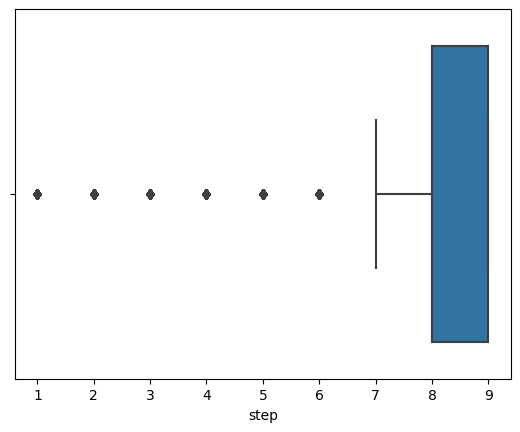

In [ ]:
sns.boxplot(data=df,x='step')


<Axes: xlabel='oldbalanceDest'>

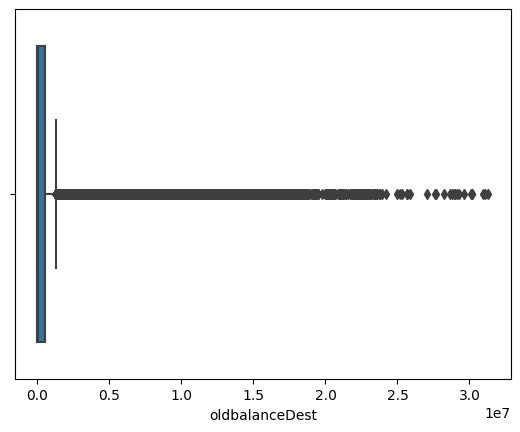

In [ ]:
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

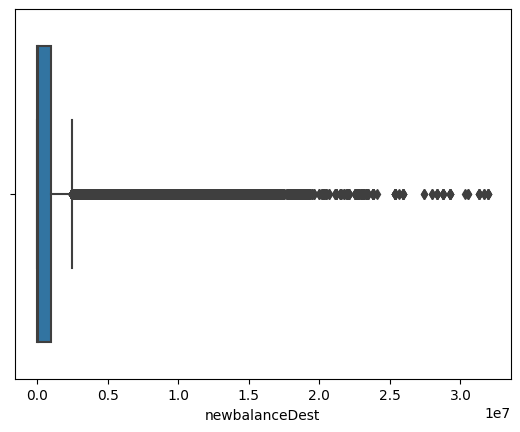

In [ ]:
sns.boxplot(data=df,x='newbalanceDest')


Now We will put the values in target column as string objects
  

In [32]:
df.loc[df['isFraud']==0,'isFraud']='is not Fraud'
df.loc[df['isFraud']==1,'isFraud']='is Fraud'
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,is not Fraud


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
69852,9,PAYMENT,31125.16,C1901051677,0.0,0.0,M552326592,0.0,0.0,is not Fraud
69853,9,PAYMENT,30681.62,C849962043,0.0,0.0,M64549705,0.0,0.0,is not Fraud
69854,9,PAYMENT,2866.47,C258151288,0.0,0.0,M1910014593,0.0,0.0,is not Fraud
69855,9,PAYMENT,2926.88,C145336381,0.0,0.0,M1278169306,0.0,0.0,is not Fraud
69856,9,PAYMENT,3704.30,C1539334900,0.0,0.0,M1849245575,0.0,0.0,is not Fraud


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:793: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


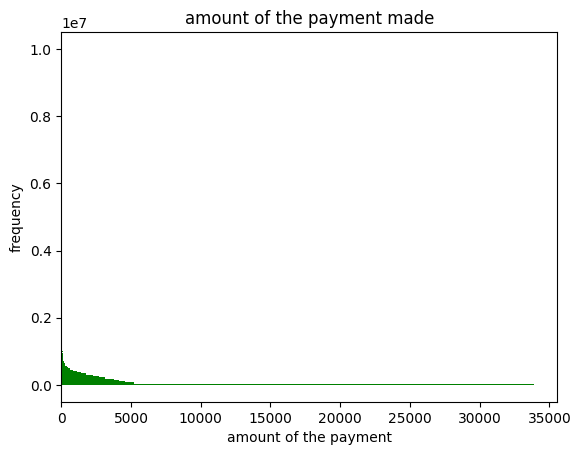

In [ ]:
#we can also add various paramaters into the 'hist' function

plt.hist(df['amount'],bins='stone',orientation='horizontal',color='green')
plt.xlabel('amount of the payment')
plt.ylabel('frequency')
plt.title('amount of the payment made')
plt.show()

In [ ]:
#pie plot


In [ ]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

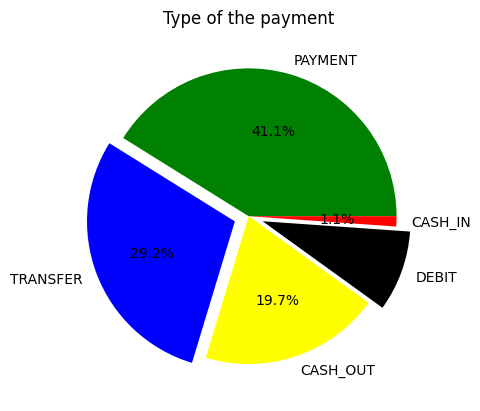

In [ ]:
plt.pie(df['type'].value_counts(),[0,0.1,0,0.1,0],labels=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],autopct='%1.1f%%',colors=['green','blue','yellow','black','red'])
plt.title('Type of the payment')
plt.show()

In [ ]:
#barplot

<Axes: ylabel='type'>

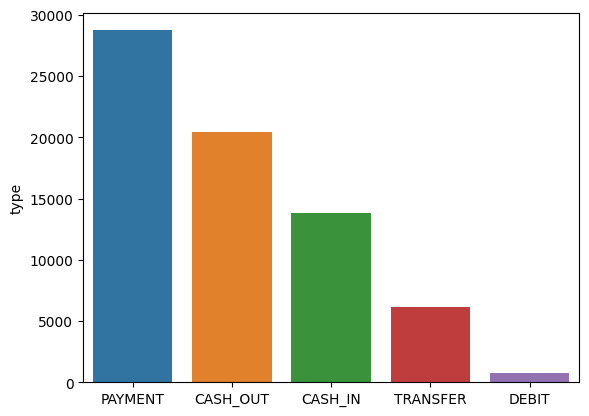

In [ ]:
sns.barplot(x=df.type.value_counts().index,y=df.type.value_counts())


So Univariate Analysis is Complete!

##Bivariate Analysis

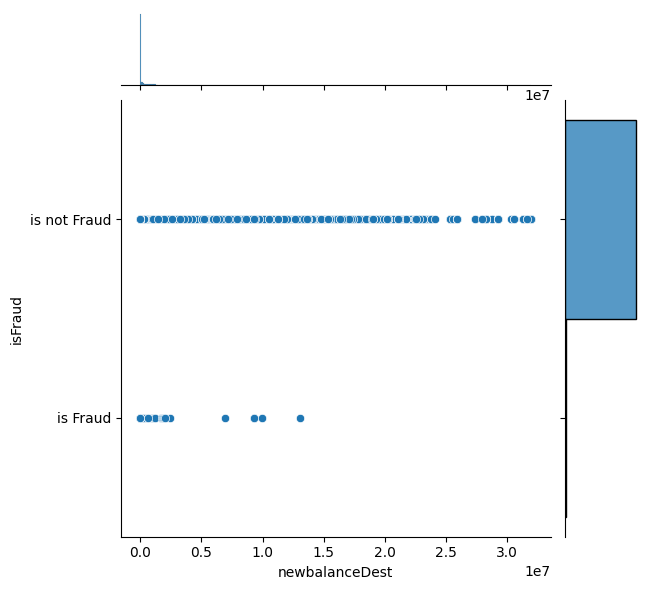

In [ ]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

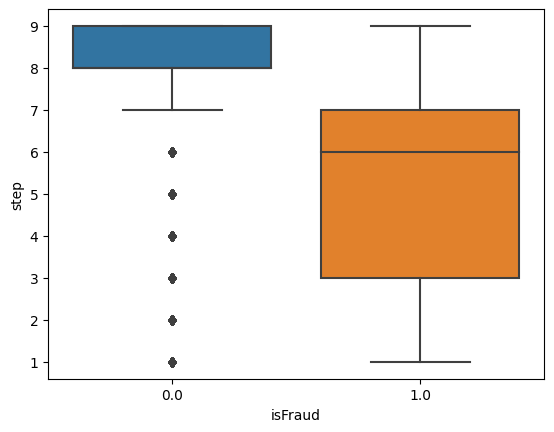

In [ ]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

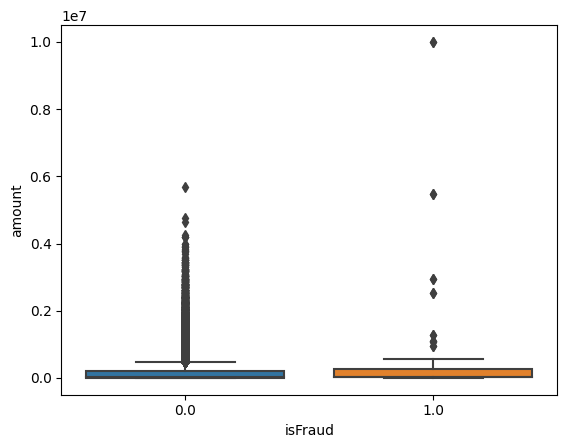

In [ ]:
sns.boxplot(data=df,x='isFraud',y='amount')


<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

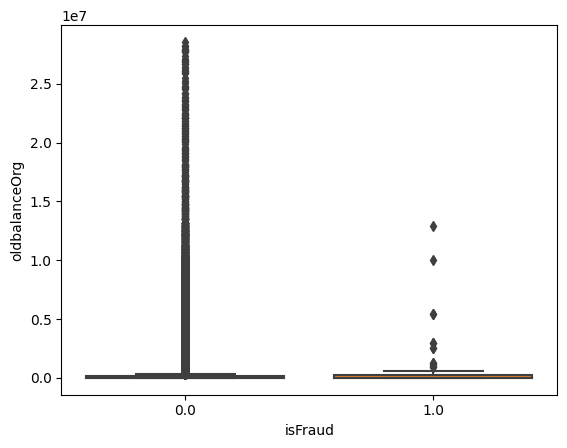

In [ ]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')


<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

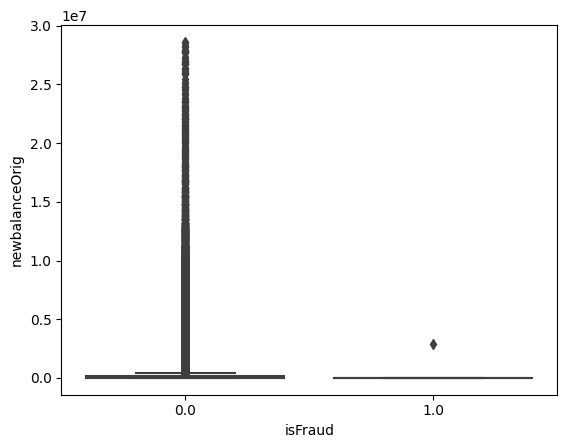

In [ ]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')


<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

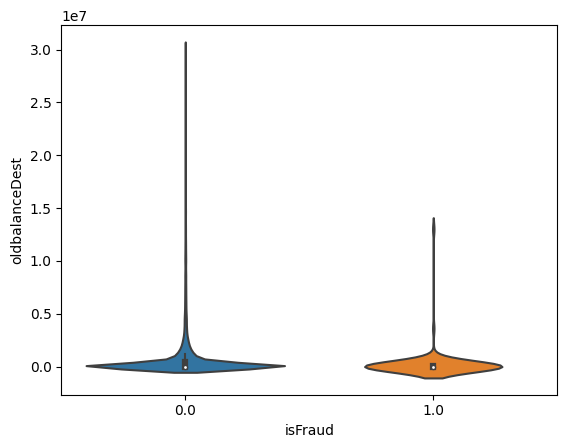

In [ ]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

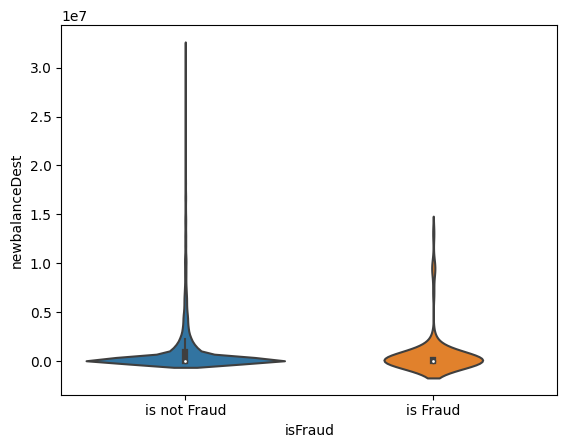

In [ ]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')


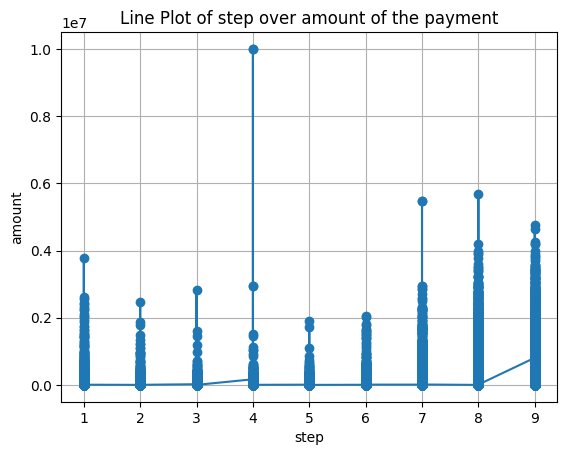

In [ ]:
# Line plot using Matplotlib
plt.plot(df['step'], df['amount'], marker='o', linestyle='-')
plt.xlabel('step')
plt.ylabel('amount')
plt.title('Line Plot of step over amount of the payment')
plt.grid(True)
plt.show()

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


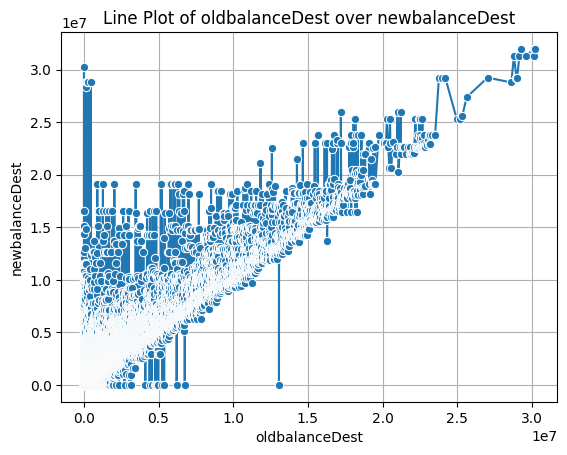

In [ ]:
#using seaborn

sns.lineplot(x='oldbalanceDest', y='newbalanceDest', data=df, marker='o')
plt.xlabel('oldbalanceDest')
plt.ylabel('newbalanceDest')
plt.title('Line Plot of oldbalanceDest over newbalanceDest')
plt.grid(True)
plt.show()

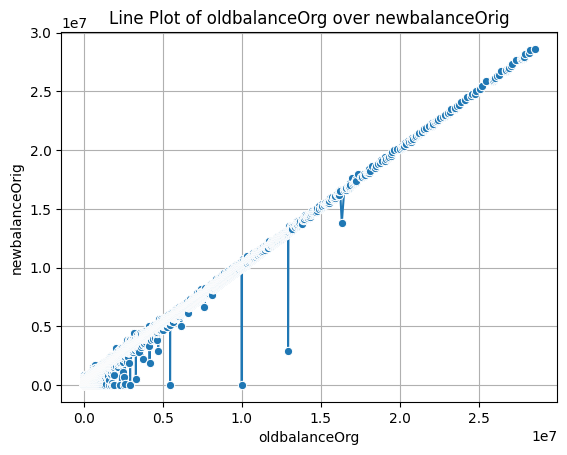

In [ ]:
#using seaborn

sns.lineplot(x='oldbalanceOrg', y='newbalanceOrig', data=df, marker='o')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('Line Plot of oldbalanceOrg over newbalanceOrig')
plt.grid(True)
plt.show()

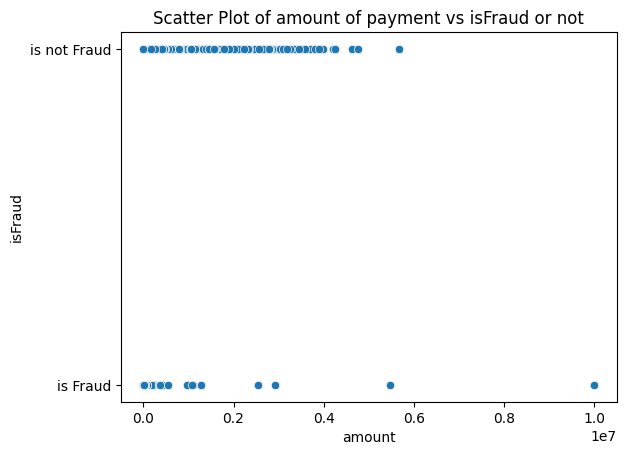

In [ ]:
xfeature="amount"
yfeature="isFraud"

sns.scatterplot(x=xfeature, y=yfeature, data=df)
plt.xlabel(xfeature)
plt.ylabel(yfeature)
plt.title('Scatter Plot of amount of payment vs isFraud or not')
plt.show()

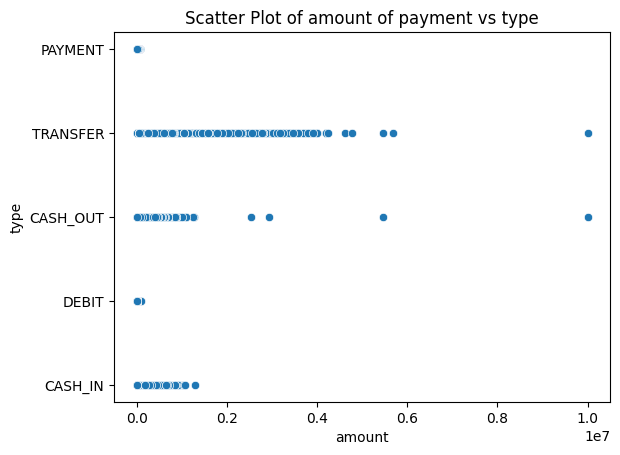

In [ ]:
xfeature="amount"
yfeature="type"

sns.scatterplot(x=xfeature, y=yfeature, data=df)
plt.xlabel(xfeature)
plt.ylabel(yfeature)
plt.title('Scatter Plot of amount of payment vs type')
plt.show()

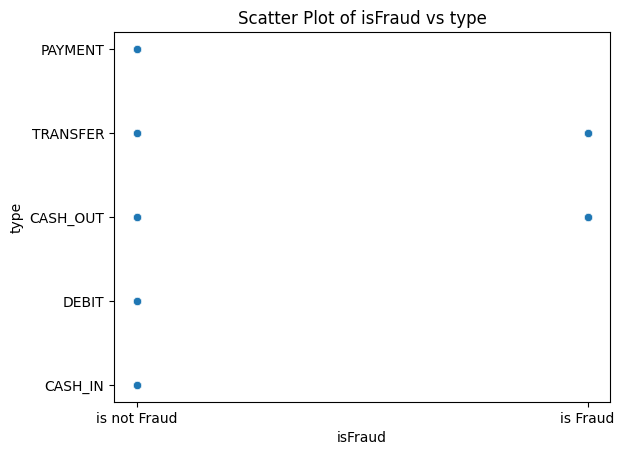

In [ ]:
xfeature="isFraud"
yfeature="type"

sns.scatterplot(x=xfeature, y=yfeature, data=df)
plt.xlabel(xfeature)
plt.ylabel(yfeature)
plt.title('Scatter Plot of isFraud vs type')
plt.show()

##Multivariate Analysis

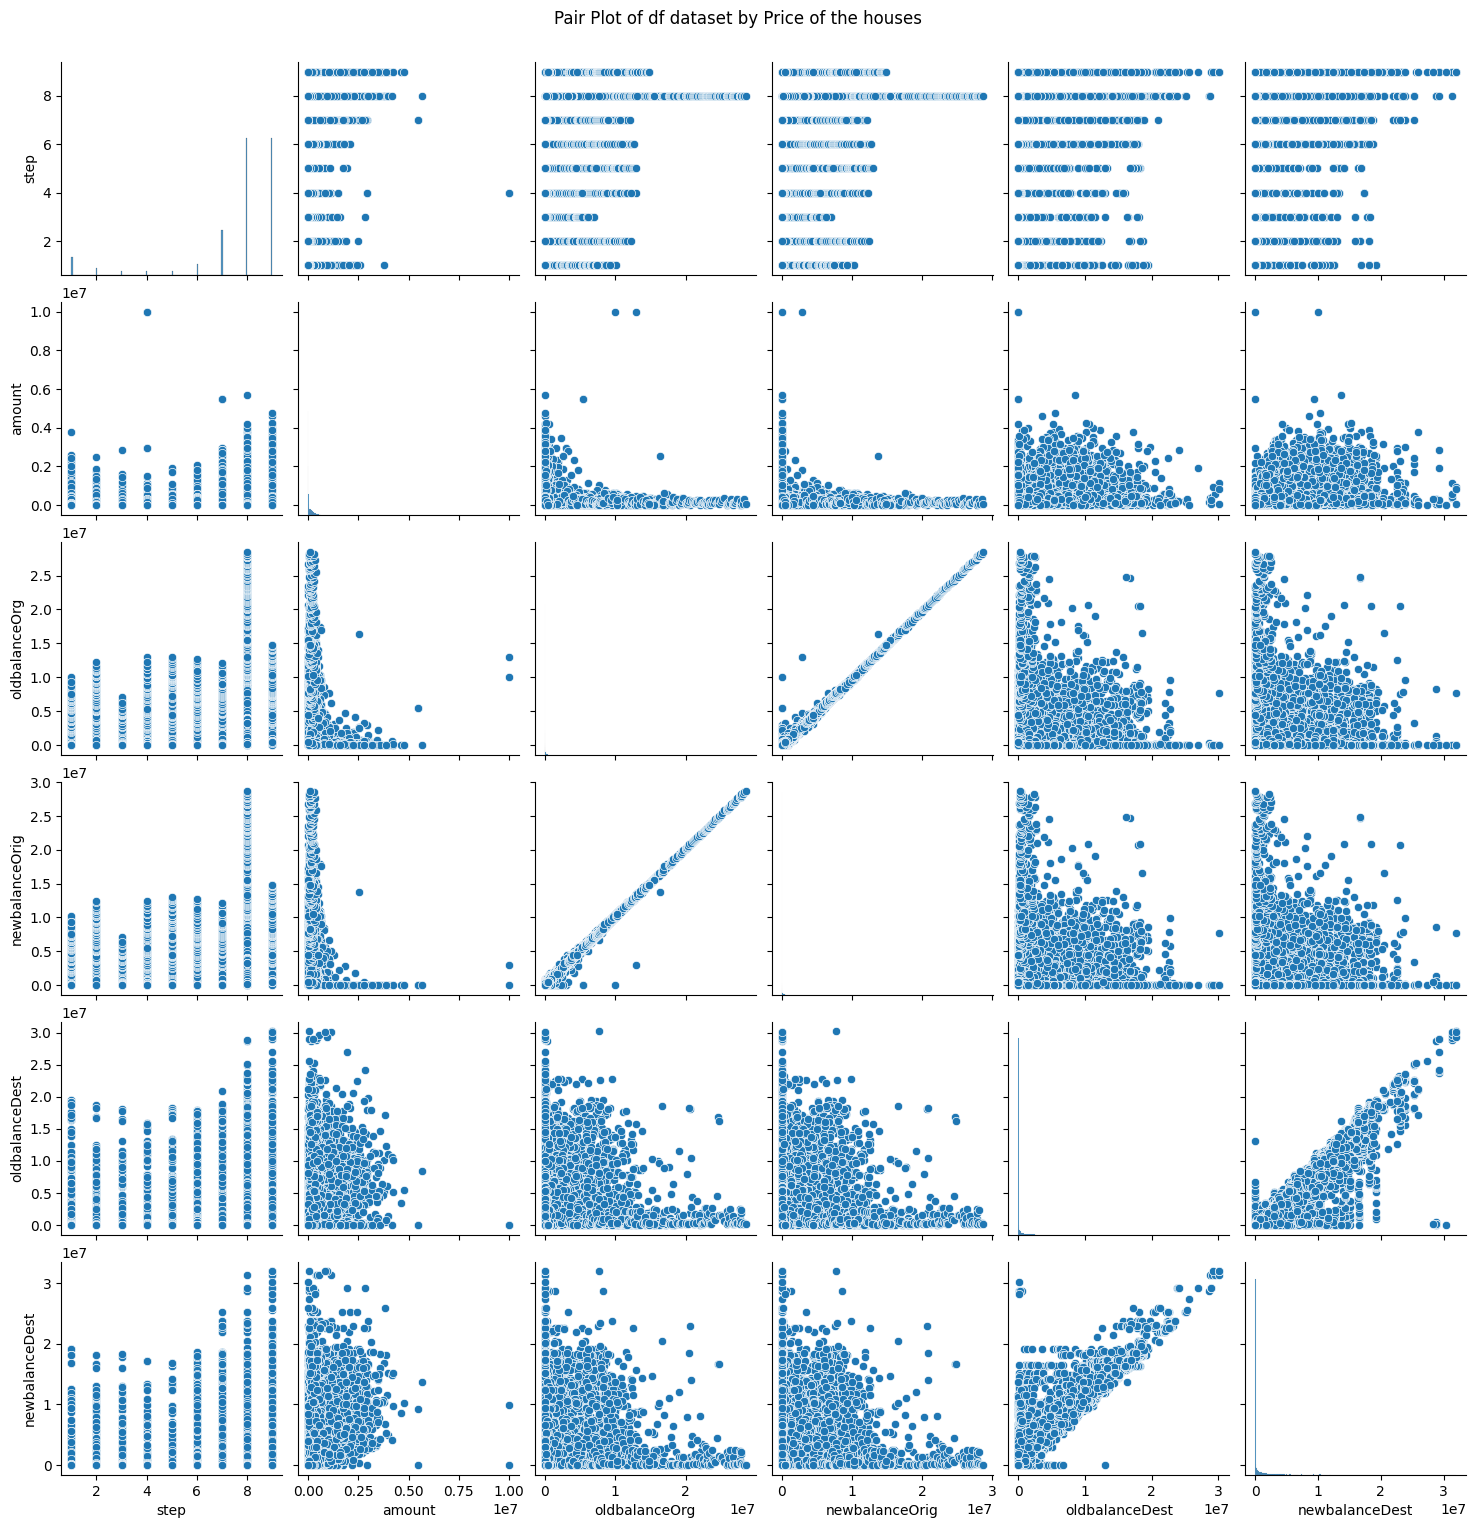

In [ ]:
# Pair plot using Seaborn
sns.pairplot(df)
plt.suptitle('Pair Plot of df dataset by Price of the houses', y=1.02)
plt.show()

<h1> So our Univariate analysis, Bi-variate analysis and Multivariate analysis is done.<br>
Now we see some descriptive statistics and do some data preprocessing
</h1>

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,56202.000000,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04
mean,7.624426,1.598924e+05,7.322726e+05,7.464767e+05,8.391746e+05,1.169835e+06
std,1.999423,3.293750e+05,2.184696e+06,2.222611e+06,2.407619e+06,2.893515e+06
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000,8.135660e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000,3.623700e+04,1.788471e+04,0.000000e+00,5.114860e+03,2.167320e+03
75%,9.000000,1.918409e+05,1.401448e+05,1.534157e+05,4.722510e+05,8.965790e+05
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,3.017978e+07,3.197699e+07


In [ ]:
df.corr()

<ipython-input-36-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
step,1.000000,0.082987,-0.044298,-0.044521,-0.003309,0.014167
amount,0.082987,1.000000,0.003141,-0.006750,0.280046,0.400350
oldbalanceOrg,-0.044298,0.003141,1.000000,0.998312,0.118636,0.084772
newbalanceOrig,-0.044521,-0.006750,0.998312,1.000000,0.121091,0.084138
oldbalanceDest,-0.003309,0.280046,0.118636,0.121091,1.000000,0.929135
newbalanceDest,0.014167,0.400350,0.084772,0.084138,0.929135,1.000000


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

#Data preprocessing

removing useless features from the dataset which will not help in any prediction of fraud payments

In [33]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [34]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,is not Fraud


##Outlier detection and replacement

In [23]:
df.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9.194174,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,3,7.530630,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,4,5.198497,181.0,0.00,0.0,0.0,is Fraud
3,1,1,5.198497,181.0,0.00,21182.0,0.0,is Fraud
4,1,3,9.364617,41554.0,29885.86,0.0,0.0,is not Fraud


<Axes: >

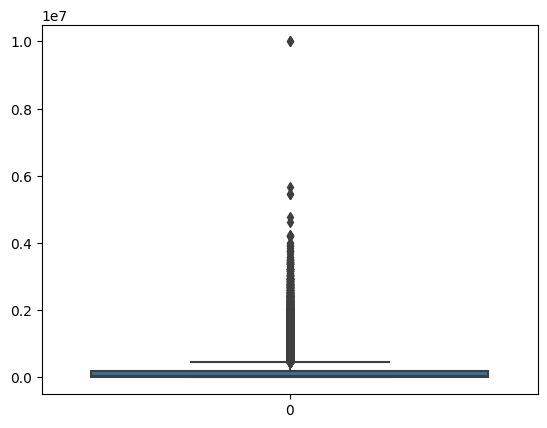

In [ ]:
sns.boxplot(df.amount)

In [35]:
print(stats.mode(df.amount))
print(np.mean(df.amount))

ModeResult(mode=10000000.0, count=32)
159256.29235830237


In [36]:
q1=np.quantile(df.amount,0.25)
q3=np.quantile(df.amount,0.75)

IQR=q3-q1

upper_bound=q3+(1.5*IQR)
lower_bound=q1-(1.5*IQR)

print('q1: ',q1)
print('q3: ',q3)
print("IQR: ",IQR)
print("upper_bound: ",upper_bound)
print("lower_bound: ",lower_bound)
print('skewed data : ',len(df[df.amount>upper_bound]))
print('skewed data : ',len(df[df.amount>lower_bound]))


q1:  12740.5775
q3:  214322.65
IQR:  201582.0725
upper_bound:  516695.75875000004
lower_bound:  -289632.53125
skewed data :  120408
skewed data :  2399370


In [37]:
def transformationPlot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)
  plt.distplot(1,2,2)
  stats.probplot(feature,plot=plt)

<ipython-input-13-74ccfea885f0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


AttributeError: ignored

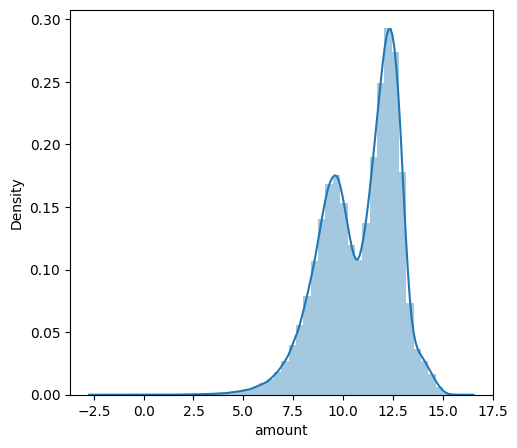

In [14]:
transformationPlot(np.log(df.amount))

In [60]:
df.amount=np.log(df.amount)

<Axes: >

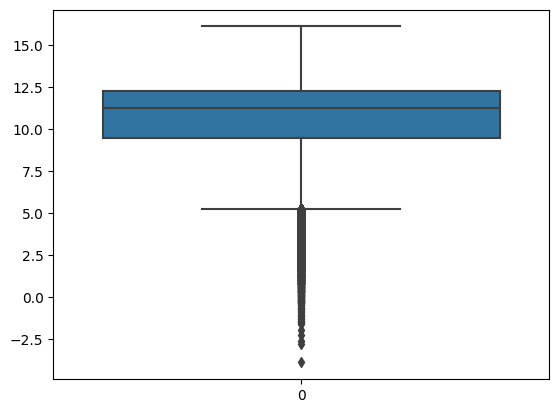

In [61]:
sns.boxplot(df.amount)

<Axes: >

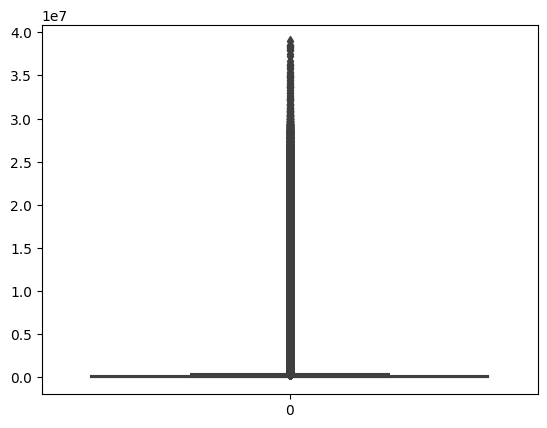

In [24]:
sns.boxplot(df.oldbalanceOrg)

<ipython-input-62-87b6ce88815f>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


<Axes: >

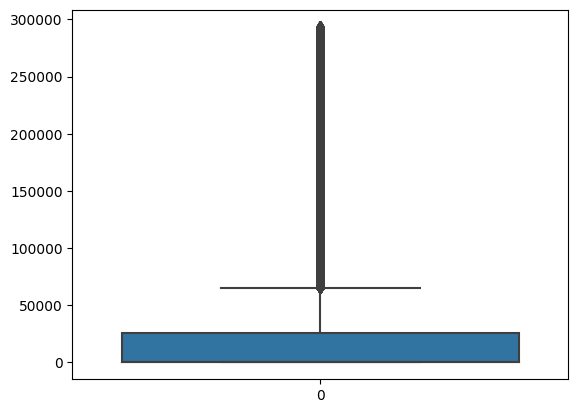

In [62]:
#so we will replace these outliers with median
q1=df['oldbalanceOrg'].quantile(0.25)
q3=df['oldbalanceOrg'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

df.median()

df['oldbalanceOrg']=np.where(df['oldbalanceOrg'] > upper_limit, 2.20, df['oldbalanceOrg'])
df['oldbalanceOrg']=np.where(df['oldbalanceOrg'] < lower_limit, 2.20, df['oldbalanceOrg'])
sns.boxplot(df['oldbalanceOrg'])

In [76]:
df.oldbalanceOrg=np.log(df.oldbalanceOrg)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Axes: >

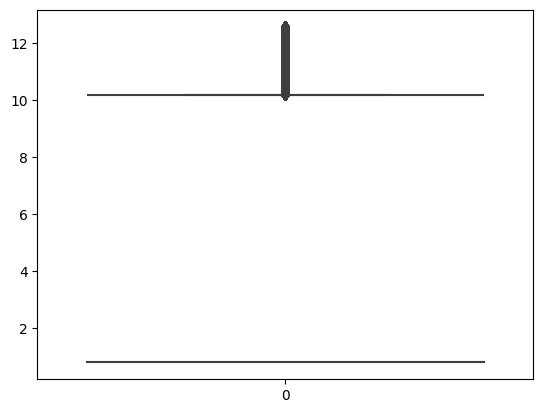

In [77]:
sns.boxplot(df.oldbalanceOrg)

In [63]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9.194174,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,3,7.530630,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,4,5.198497,181.0,0.00,0.0,0.0,is Fraud
3,1,1,5.198497,181.0,0.00,21182.0,0.0,is Fraud
4,1,3,9.364617,41554.0,29885.86,0.0,0.0,is not Fraud


##Object data label Encoding

In [39]:
le=LabelEncoder()
df.type=le.fit_transform(df.type)

In [40]:
df.type.value_counts()

1    853290
3    803491
0    527823
4    198968
2     15798
Name: type, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2399370 entries, 0 to 2399369
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         object 
dtypes: float64(5), int64(2), object(1)
memory usage: 164.8+ MB


In [64]:
df.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9.194174,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,3,7.530630,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,4,5.198497,181.0,0.00,0.0,0.0,is Fraud
3,1,1,5.198497,181.0,0.00,21182.0,0.0,is Fraud
4,1,3,9.364617,41554.0,29885.86,0.0,0.0,is not Fraud


<h3> Now dividing our dataset into dependent and independent columns


In [65]:
y=df.isFraud
x=df.drop('isFraud',axis=1)

In [66]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9.194174,170136.00,160296.36,0.0,0.00
1,1,3,7.530630,21249.00,19384.72,0.0,0.00
2,1,4,5.198497,181.00,0.00,0.0,0.00
3,1,1,5.198497,181.00,0.00,21182.0,0.00
4,1,3,9.364617,41554.00,29885.86,0.0,0.00
...,...,...,...,...,...,...,...
2399365,201,3,8.253657,3056.00,0.00,0.0,0.00
2399366,201,3,6.783925,6059.00,5175.47,0.0,0.00
2399367,201,4,12.590946,11151.00,0.00,0.0,293885.59
2399368,201,3,7.998745,49635.00,46657.78,0.0,0.00


In [67]:
y

0          is not Fraud
1          is not Fraud
2              is Fraud
3              is Fraud
4          is not Fraud
               ...     
2399365    is not Fraud
2399366    is not Fraud
2399367    is not Fraud
2399368    is not Fraud
2399369    is not Fraud
Name: isFraud, Length: 2399370, dtype: object

##Splitting the dataset into training and testing parts

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [47]:
x_train.shape

(1679559, 7)

In [48]:
x_test.shape

(719811, 7)

In [49]:
y_train.shape

(1679559,)

In [50]:
y_test.shape

(719811,)

<h1> Data Preprocessing is finished!


#Model Building

###1. Random Forest Classifier

In [51]:
rfc=RandomForestClassifier()

In [69]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
y_test_pred1=rfc.predict(x_test)

In [71]:
#testing accuracy
accuracy_score(y_test,y_test_pred1)

0.9997429880899291

In [72]:
#ttraining accuracy
y_train_pred1=rfc.predict(x_train)

In [73]:
accuracy_score(y_train,y_train_pred1)

1.0

In [74]:
pd.crosstab(y_test,y_test_pred1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,521,179
is not Fraud,6,719105


In [75]:
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

    is Fraud       0.99      0.74      0.85       700
is not Fraud       1.00      1.00      1.00    719111

    accuracy                           1.00    719811
   macro avg       0.99      0.87      0.92    719811
weighted avg       1.00      1.00      1.00    719811



In [86]:
#testing on random values
rfc.predict([[1,3,9.364617,	41554.00,	29885.86,	0.0,	0.00]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['is not Fraud'], dtype=object)

In [88]:
rfc.predict([[1,	1,	5.198497,	181.00,	0.00,	21182.0,	0.00]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['is Fraud'], dtype=object)

###2. Decision Tree Classifier

In [78]:
dtc=DecisionTreeClassifier()

In [79]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
y_test_pred2=dtc.predict(x_test)
accuracy_score(y_test,y_test_pred2)

0.9996249015366534

In [82]:
y_train_pred2=dtc.predict(x_train)
accuracy_score(y_train,y_train_pred2)

1.0

In [83]:
pd.crosstab(y_test,y_test_pred2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,548,152
is not Fraud,118,718993


In [84]:
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

    is Fraud       0.82      0.78      0.80       700
is not Fraud       1.00      1.00      1.00    719111

    accuracy                           1.00    719811
   macro avg       0.91      0.89      0.90    719811
weighted avg       1.00      1.00      1.00    719811



In [89]:
#testing on random values
dtc.predict([[1,	1,	5.198497,	181.00,	0.00,	21182.0,	0.00]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['is Fraud'], dtype=object)

###3. Extra Trees Classifier

In [90]:
etc=ExtraTreesClassifier()

In [91]:
etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [93]:
y_test_pred3=etc.predict(x_test)
accuracy_score(y_test,y_test_pred3)

0.9997249277935458

In [94]:
y_train_pred3=etc.predict(x_train)
accuracy_score(y_train,y_train_pred3)

1.0

In [95]:
pd.crosstab(y_test,y_test_pred3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,507,193
is not Fraud,5,719106


In [96]:
print(classification_report(y_test,y_test_pred3))

              precision    recall  f1-score   support

    is Fraud       0.99      0.72      0.84       700
is not Fraud       1.00      1.00      1.00    719111

    accuracy                           1.00    719811
   macro avg       0.99      0.86      0.92    719811
weighted avg       1.00      1.00      1.00    719811



In [97]:
#testing on random values
etc.predict([[1,	1,	5.198497,	181.00,	0.00,	21182.0,	0.00]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


array(['is Fraud'], dtype=object)

In [98]:
etc.predict([[1,3,9.364617,	41554.00,	29885.86,	0.0,	0.00]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


array(['is not Fraud'], dtype=object)

###4. SVC

In [99]:
svc=SVC()

In [100]:
svc.fit(x_train,y_train)

SVC()

In [107]:
y_test_pred4=svc.predict(x_test)
accuracy_score(y_test,y_test_pred4)

0.9990275225024347

In [102]:
y_train_pred4=svc.predict(x_train)
accuracy_score(y_train,y_train_pred4)

0.9990699939686548

In [113]:
pd.crosstab(y_test,y_test_pred4)

col_0,is not Fraud
isFraud,
is Fraud,700
is not Fraud,719111


In [104]:
print(classification_report(y_test,y_test_pred4))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    is Fraud       0.00      0.00      0.00       700
is not Fraud       1.00      1.00      1.00    719111

    accuracy                           1.00    719811
   macro avg       0.50      0.50      0.50    719811
weighted avg       1.00      1.00      1.00    719811



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
#testing on random values
svc.predict([[1,	1,	5.198497,	181.00,	0.00,	21182.0,	0.00]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['is not Fraud'], dtype=object)

In [106]:
svc.predict([[1,3,9.364617,	41554.00,	29885.86,	0.0,	0.00]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['is not Fraud'], dtype=object)

In [108]:
le=LabelEncoder()

In [109]:
y_train1=le.fit_transform(y_train)

In [110]:
y_test1=le.fit_transform(y_test)

In [111]:
y_test1

array([1, 1, 1, ..., 1, 1, 1])

In [112]:
y_train1

array([1, 1, 1, ..., 1, 1, 1])

###5. XG boost Classifier

In [114]:
xgb1=xgb.XGBClassifier()

In [115]:
xgb1.fit(x_train,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [117]:
y_test_pred5=xgb1.predict(x_test)
accuracy_score(y_test1,y_test_pred5)

0.9998180077825984

In [118]:
y_train_pred5=xgb1.predict(x_train)
accuracy_score(y_train1,y_train_pred5)

0.999885088883451

In [119]:
pd.crosstab(y_test1,y_test_pred5)

col_0,0,1
row_0,,
0,587,113
1,18,719093


In [120]:
print(classification_report(y_test1,y_test_pred5))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       700
           1       1.00      1.00      1.00    719111

    accuracy                           1.00    719811
   macro avg       0.99      0.92      0.95    719811
weighted avg       1.00      1.00      1.00    719811



In [121]:
#testing on random values
xgb1.predict([[1,	1,	5.198497,	181.00,	0.00,	21182.0,	0.00]])

array([0])

In [122]:
xgb1.predict([[1,3,9.364617,	41554.00,	29885.86,	0.0,	0.00]])

array([1])

#Compare Model

In [123]:
def compare_model():
  print("train accuracy for rfc : ",accuracy_score(y_test,y_test_pred1))
  print("test accuracy for rfc : ",accuracy_score(y_train,y_train_pred1))
  print("train accuracy for dtc : ",accuracy_score(y_test,y_test_pred2))
  print("test accuracy for dtc : ",accuracy_score(y_train,y_train_pred2))
  print("train accuracy for etc : ",accuracy_score(y_test,y_test_pred3))
  print("test accuracy for etc : ",accuracy_score(y_train,y_train_pred3))
  print("train accuracy for svc : ",accuracy_score(y_test,y_test_pred4))
  print("test accuracy for svc : ",accuracy_score(y_train,y_train_pred4))
  print("train accuracy for xgb1 : ",accuracy_score(y_test1,y_test_pred5))
  print("test accuracy for xgb1 : ",accuracy_score(y_train1,y_train_pred5))


In [124]:
compare_model()

train accuracy for rfc :  0.9997429880899291
test accuracy for rfc :  1.0
train accuracy for dtc :  0.9996249015366534
test accuracy for dtc :  1.0
train accuracy for etc :  0.9997249277935458
test accuracy for etc :  1.0
train accuracy for svc :  0.9990275225024347
test accuracy for svc :  0.9990699939686548
train accuracy for xgb1 :  0.9998180077825984
test accuracy for xgb1 :  0.999885088883451


<h1> we have the best model of XGB classifier with an accuracy of 99.98 %.



#saving the model

In [125]:
pickle.dump(xgb1,open('projectPGP.pkl','wb'))